## 문자열 자료들을 0 또는 1로 변경하여 진행

<hr>

In [474]:
import pandas as pd

sleep = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

sleep.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


#### 성별(Gender) 숫자로 변환하기 (원 핫 인코딩)

In [475]:
onehot_gender = pd.get_dummies(sleep['Gender'])
sleep = pd.concat([sleep, onehot_gender], axis=1)

sleep.drop(['Gender'], axis=1, inplace=True)

In [476]:
# 위의 방법 사용 시 'Male', 'Female'로 구분되어 이름 저장.

# 아래 방법 사용 시 기존의 'Gender' 열 그대로 사용하되, 남자는 1, 여자는 0으로 값 저장됨.
# sleep['Gender'] = pd.get_dummies(sleep['Gender'], drop_first=True)                                        
## Gender --> 1: 남자,  0: 여자

In [477]:
sleep.head(3)

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,0,1
1,2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,0,1
2,3,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,0,1


#### 사용하지 않을 Person ID, Occupation(직업) 열 제거

In [478]:
sleep.drop(['Person ID','Occupation'], axis=1, inplace=True)             

##### BMI Category 수치를 0, 1로 변경하기

In [479]:
sleep['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [480]:
onehot_bmi = pd.get_dummies(sleep['BMI Category'])
sleep = pd.concat([sleep, onehot_bmi], axis=1)

sleep.drop(['BMI Category'], axis=1, inplace=True)

In [481]:
# 위의 방법 사용 시 'Overweight', 'Normal', 'Obese', 'Normal Weight' 열 이름으로 저장.

# 아래 방법 사용 시 'BMI Category_Normal','BMI Category_Normal Weight','BMI Category_Obese','BMI Category_Overweight'으로 열이름 저장.
# sleep = pd.get_dummies(data=sleep, columns = ['BMI Category'])

In [482]:
sleep.head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male,Normal,Normal Weight,Obese,Overweight
0,27,6.1,6,42,6,126/83,77,4200,None,0,1,0,0,0,1
1,28,6.2,6,60,8,125/80,75,10000,None,0,1,1,0,0,0
2,28,6.2,6,60,8,125/80,75,10000,None,0,1,1,0,0,0


#### Blodd Pressure 혈압에서 수축기 자료만 가져오기

In [483]:
for i in range(len(sleep['Blood Pressure'])):
    sleep.loc[i, 'Blood Pressure'] = sleep['Blood Pressure'][i].split('/')[0]

In [484]:
sleep['Blood Pressure'] = sleep['Blood Pressure'].astype('int')

In [485]:
sleep.head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male,Normal,Normal Weight,Obese,Overweight
0,27,6.1,6,42,6,126,77,4200,None,0,1,0,0,0,1
1,28,6.2,6,60,8,125,75,10000,None,0,1,1,0,0,0
2,28,6.2,6,60,8,125,75,10000,None,0,1,1,0,0,0


##### Sleep Disorder 값 숫자로 변경하기 (레이블 인코딩)

In [486]:
sleep['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [487]:
onehot_disorder = pd.get_dummies(sleep['Sleep Disorder'])
sleep = pd.concat([sleep, onehot_disorder], axis=1)

sleep.drop(['Sleep Disorder'], axis=1, inplace=True)

In [488]:
# 위의 방법 사용 시 'None', 'Sleep Apnea', 'Insomnia' 열 이름으로 저장.

# 아래 방법 사용 시 'Sleep Disorder_Insomnia', 'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea'으로 열이름 저장.
# sleep = pd.get_dummies(data=sleep, columns = ['Sleep Disorder'])

In [489]:
sleep.head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Female,Male,Normal,Normal Weight,Obese,Overweight,Insomnia,None,Sleep Apnea
0,27,6.1,6,42,6,126,77,4200,0,1,0,0,0,1,0,1,0
1,28,6.2,6,60,8,125,75,10000,0,1,1,0,0,0,0,1,0
2,28,6.2,6,60,8,125,75,10000,0,1,1,0,0,0,0,1,0


In [490]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep Duration           374 non-null    float64
 2   Quality of Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   Blood Pressure           374 non-null    int32  
 6   Heart Rate               374 non-null    int64  
 7   Daily Steps              374 non-null    int64  
 8   Female                   374 non-null    uint8  
 9   Male                     374 non-null    uint8  
 10  Normal                   374 non-null    uint8  
 11  Normal Weight            374 non-null    uint8  
 12  Obese                    374 non-null    uint8  
 13  Overweight               374 non-null    uint8  
 14  Insomnia                 3

<hr>

#### 훈련 데이터와 테스트 데이터 나누기 (비율 7 : 3)

In [513]:
from sklearn.model_selection import train_test_split

X = sleep[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level','Blood Pressure', 'Heart Rate', 'Daily Steps', 'Female', 'Male', 
           'Normal', 'Normal Weight', 'Obese', 'Overweight']].to_numpy()
y = sleep[['Insomnia', 'None', 'Sleep Apnea']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)                

In [514]:
X_train.shape, X_test.shape

((261, 14), (113, 14))

In [515]:
y_train.shape, y_test.shape

((261, 3), (113, 3))

<hr>

## K-NN 회귀 ( Scale X )

#### 훈련 데이터 7 : 3 테스트 데이터

In [516]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,11):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train, y_train)

    print('훈련데이터 점수:', i, knr.score(X_train, y_train))
    print('테스트데이터 점수:',i, knr.score(X_test, y_test))
    print()

훈련데이터 점수: 1 0.7172682535245899
테스트데이터 점수: 1 0.5561118415083928

훈련데이터 점수: 2 0.7509548971683008
테스트데이터 점수: 2 0.47213484040546944

훈련데이터 점수: 3 0.7656541479205793
테스트데이터 점수: 3 0.5346364603691073

훈련데이터 점수: 4 0.741530115164335
테스트데이터 점수: 4 0.6060181518220639

훈련데이터 점수: 5 0.710315477015874
테스트데이터 점수: 5 0.6562807133449658

훈련데이터 점수: 6 0.6903142469464303
테스트데이터 점수: 6 0.6798399372084417

훈련데이터 점수: 7 0.6719334106846513
테스트데이터 점수: 7 0.6798708112580892

훈련데이터 점수: 8 0.6519776395661414
테스트데이터 점수: 8 0.6731534013481634

훈련데이터 점수: 9 0.6374325604198966
테스트데이터 점수: 9 0.6547756024369306

훈련데이터 점수: 10 0.627876175864391
테스트데이터 점수: 10 0.6637927227317956



## K-NN 회귀 ( Scale O )

#### 훈련 데이터 7 : 3 테스트 데이터

In [517]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [518]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,11):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train_scaled, y_train)

    print('훈련데이터 점수:', i, knr.score(X_train_scaled, y_train))
    print('테스트데이터 점수:',i, knr.score(X_test_scaled, y_test))
    print()

훈련데이터 점수: 1 0.7172682535245899
테스트데이터 점수: 1 0.4688849036265818

훈련데이터 점수: 2 0.7335574412735896
테스트데이터 점수: 2 0.4306581299433688

훈련데이터 점수: 3 0.7659904096833698
테스트데이터 점수: 3 0.5267477811045377

훈련데이터 점수: 4 0.7601861799419187
테스트데이터 점수: 4 0.5974712800264853

훈련데이터 점수: 5 0.7437572992903453
테스트데이터 점수: 5 0.6243970768156529

훈련데이터 점수: 6 0.73381698569165
테스트데이터 점수: 6 0.6409971905512857

훈련데이터 점수: 7 0.7156658281773088
테스트데이터 점수: 7 0.6634803876642424

훈련데이터 점수: 8 0.7068605842713397
테스트데이터 점수: 8 0.6566109496477918

훈련데이터 점수: 9 0.7072102670038607
테스트데이터 점수: 9 0.6652686997023185

훈련데이터 점수: 10 0.6954928199812006
테스트데이터 점수: 10 0.6615791731509165



### K-NN 회귀 결과

- Scale 하지 않았을 때
    - 이웃 6개 일 때 점수가 괜찮아 보인다. <br>
    훈련데이터 점수: 0.6903142469464303 <br>
    테스트데이터 점수: 0.6798399372084417 <br>
- Scale 했을 때
    - 이웃 10개 일 때 점수가 괜찮아 보인다. <br>
    훈련데이터 점수: 0.6954928199812006 <br>
    테스트데이터 점수: 0.6615791731509165 <br>
<br>
- 스케일 진행 여부에 따른 결과가 큰 차이 없음을 확인 가능.

<hr>

## 다항회귀 ( Scale X )

#### 훈련 데이터 7 : 3 테스트 데이터

In [519]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [520]:
print(f"기울기(W): {lr.coef_}")
print(f"절편(b): {lr.intercept_}")

기울기(W): [[ 1.33387352e-02 -1.11867453e-01 -2.20644700e-01  4.45877706e-04
  -6.69358852e-02 -4.55305938e-03 -4.89699772e-02 -6.18444881e-05
  -1.28575337e-01  1.28575337e-01 -3.33528689e-01 -9.11746243e-02
   4.40529037e-01 -1.58257229e-02]
 [-5.62932309e-03 -1.69632467e-02  1.22987466e-01 -2.33684303e-04
   1.63724093e-02 -1.44717445e-02  6.19085142e-03  7.99766335e-06
  -2.94412724e-02  2.94412724e-02  3.11110173e-01  2.35679530e-01
  -3.77571667e-01 -1.69218035e-01]
 [-7.70941207e-03  1.28830700e-01  9.76572343e-02 -2.12193403e-04
   5.05634759e-02  1.90248039e-02  4.27791258e-02  5.38468247e-05
   1.58016610e-01 -1.58016610e-01  2.24185166e-02 -1.44504906e-01
  -6.29573691e-02  1.85043758e-01]]
절편(b): [ 7.01347185  1.25604746 -7.26951932]


In [521]:
print(lr.score(X_train, y_train))    
print(lr.score(X_test, y_test))

0.590779948890014
0.5968311307232993


## 다항회귀 ( Scale O )

#### 훈련 데이터 7 : 3 테스트 데이터

In [522]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [523]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)

LinearRegression()

In [524]:
X_train_scaled[:3]

array([[-1.46257142,  0.58666288, -0.29170765,  0.70030655,  0.38031356,
        -1.07030278, -0.03809277,  0.68679947, -1.04307238,  1.04307238,
         0.96609178, -0.25555063, -0.153393  , -0.81389212],
       [ 1.86095841,  1.10005438,  1.41920689,  0.70030655, -1.33109746,
         1.46923381, -0.52307881,  0.06867995,  0.95870624, -0.95870624,
        -1.03509834, -0.25555063, -0.153393  ,  1.22866406],
       [-1.10647894, -1.46690309, -1.14716493, -1.46590373,  1.52125424,
        -0.43541863,  0.44689326, -1.1675591 , -1.04307238,  1.04307238,
         0.96609178, -0.25555063, -0.153393  , -0.81389212]])

In [525]:
X_test_scaled[:3]

array([[ 1.26747094,  1.74179374,  1.41920689, -1.46590373, -1.33109746,
        -0.43541863, -1.25055786, -1.1675591 ,  0.95870624, -0.95870624,
         0.96609178, -0.25555063, -0.153393  , -0.81389212],
       [-1.34387392, -1.33855522, -1.14716493, -1.46590373,  1.52125424,
        -0.43541863,  0.44689326, -1.1675591 , -1.04307238,  1.04307238,
         0.96609178, -0.25555063, -0.153393  , -0.81389212],
       [-1.58126891, -1.46690309, -1.14716493, -1.46590373,  1.52125424,
        -1.07030278, -0.03809277,  0.68679947, -1.04307238,  1.04307238,
         0.96609178, -0.25555063, -0.153393  , -0.81389212]])

In [526]:
print(lr2.score(X_train_scaled, y_train))    
print(lr2.score(X_test_scaled, y_test))

0.590779948890014
0.5968311307233035


### 다항회귀 결과

- Scale 하지 않았을 때
    훈련데이터 점수: 0.5907799488900136 <br>
    테스트데이터 점수: 0.5968311307233201 <br>
- Scale 했을 때
    - 이웃 10개 일 때 점수가 괜찮아 보인다. <br>
    훈련데이터 점수: 0.590779948890014 <br>
    테스트데이터 점수: 0.5968311307233035 <br>
<br>
- 스케일 진행 여부에 따른 결과가 큰 차이 없음을 확인 가능.

<hr>

# 시각화

### 1. CSV 자료 분포 확인

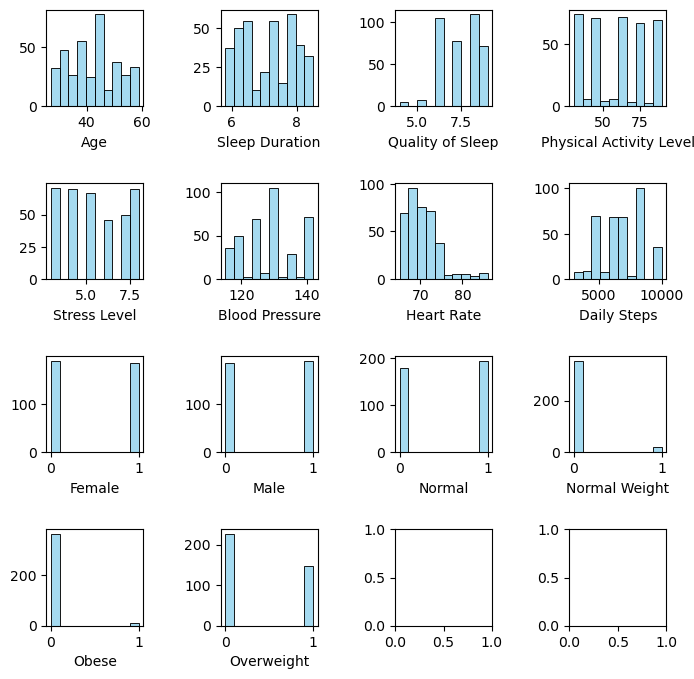

In [551]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

a = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level','Blood Pressure', 'Heart Rate', 'Daily Steps', 'Female', 'Male', 
           'Normal', 'Normal Weight', 'Obese', 'Overweight']

for i, sub in enumerate(a):
    sns.histplot(sleep[sub], bins=10, color='skyblue', ax=axs[int(i/4), i%4]).set_ylabel("")    

plt.show()

<hr>

### 2. 히트맵

In [547]:
sleep.corr().head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Female,Male,Normal,Normal Weight,Obese,Overweight,Insomnia,None,Sleep Apnea
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,0.605878,-0.225606,0.057973,0.596358,-0.596358,-0.446153,-0.107106,-0.080075,0.532606,0.078478,-0.432007,0.445719
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.180406,-0.516455,-0.039533,0.121579,-0.121579,0.343835,0.061774,-0.035896,-0.368484,-0.347618,0.338622,-0.064626
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.121632,-0.659865,0.016791,0.291366,-0.291366,0.304475,0.023616,-0.126574,-0.280398,-0.332406,0.310984,-0.046254


<Axes: >

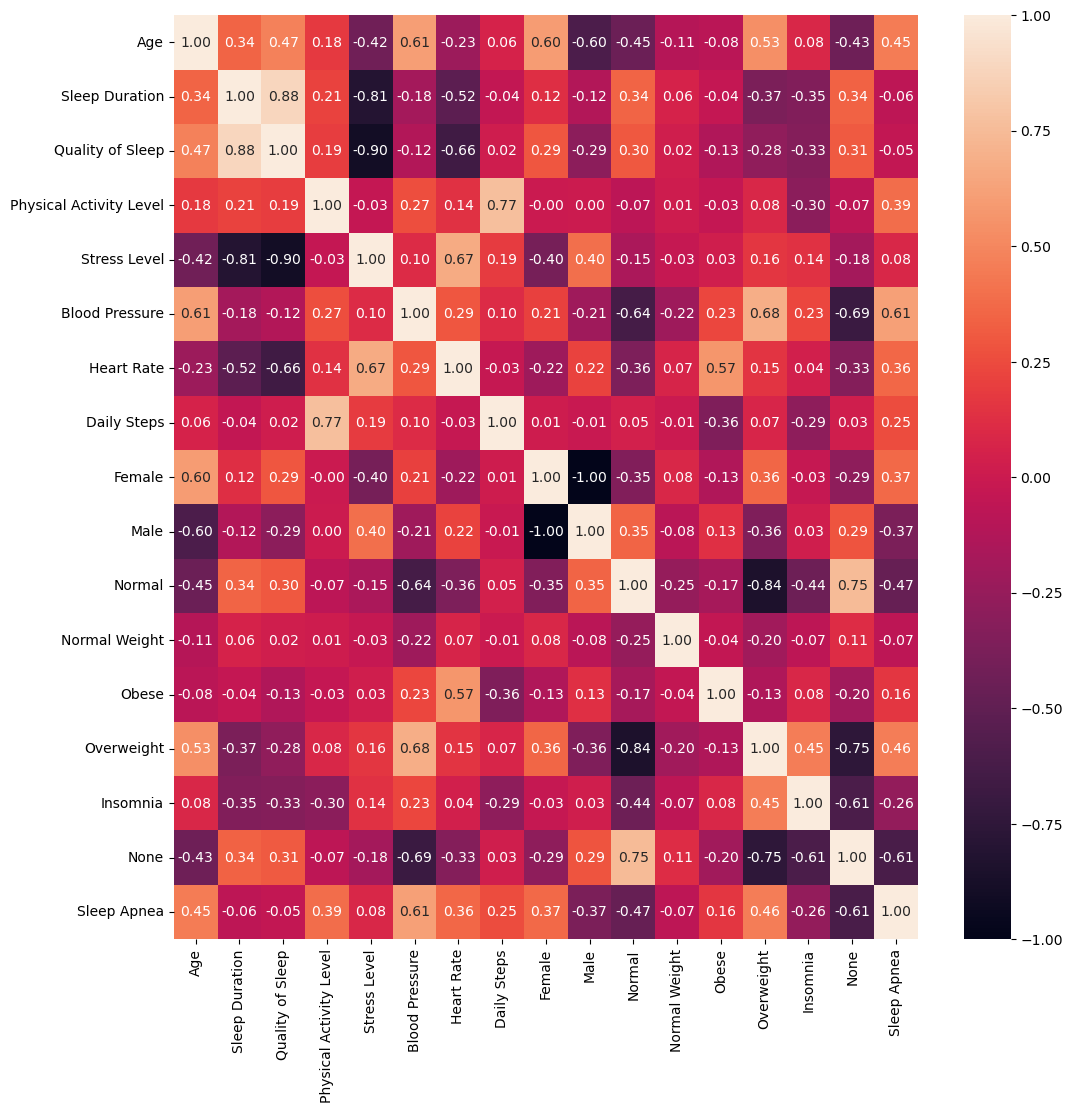

In [548]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(12,12))
sns.heatmap(data = sleep.corr(), annot=True, fmt = '.2f')